In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

from joblib import dump,load

In [12]:
df=pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/diamond_pricing.csv')
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Paleonium  1000 non-null   int64  
 1   Pressure   1000 non-null   int64  
 2   Price      1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089


In [18]:
px.scatter_3d(df,x='Paleonium',y='Pressure',z='Price')

In [7]:
X=df[['Paleonium','Pressure']]
y=df['Price']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2,random_state=1)

In [8]:
model=DecisionTreeRegressor()
model.fit(xtrain,ytrain)


DecisionTreeRegressor()

In [9]:
print("score:",model.score(xtest,ytest)*100)
pred=model.predict(X)
print("mse:",mean_squared_error(y,pred))
print("mae:",mean_absolute_error(y,pred))

score: 95.35696773169111
mse: 4314.552052591021
mae: 22.159832972437


<AxesSubplot:ylabel='Density'>

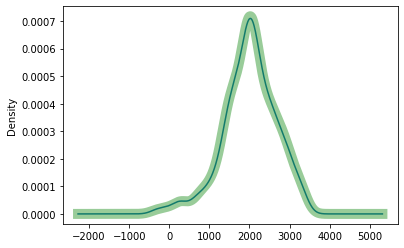

In [14]:
df['p1']=pred
ax=df['Price'].plot(kind='kde')
df['p1'].plot(kind='kde',ax=ax,alpha=.4,color='green',linewidth=10)

In [15]:
dump(model,"basic_diamond_pricing.pkl")

['basic_diamond_pricing.pkl']

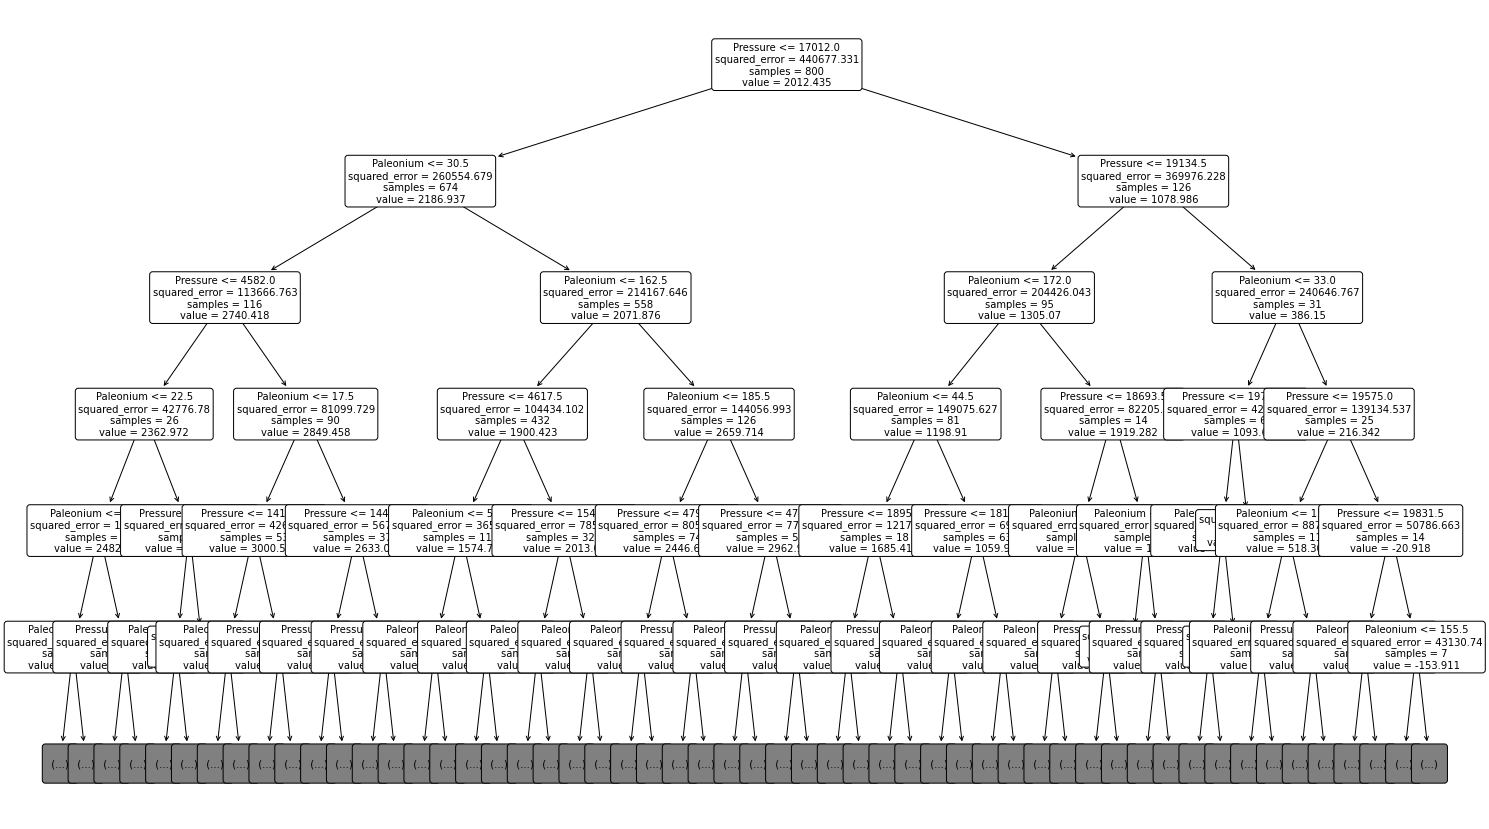

In [20]:
plt.figure(figsize=(25,15))
plot_tree(model,max_depth=5,fontsize=10,feature_names=['Paleonium','Pressure'],rounded=True)
plt.show()